In [1]:
import census
import pandas as pd
import geopandas as gpd
import censusdata
import censusgeocode as cg
import geopy
from geopy.geocoders import Nominatim
import numpy as np
import plotly_express as px
import matplotlib.pyplot as plt
import requests
from plotnine import *
#for coordinate
from geopy.distance import geodesic
from geopy.geocoders import Nominatim

In [48]:
df

,Unnamed: 0,Rank,Store ID,Total Visits,lat,lng,Store,Address
0,0,1,1792.0,1086355,26.255705,-80.102022,Lowe's,"1851 N Federal Hwy, Pompano Beach, FL, United..."
1,1,2,1855.0,990922,29.204567,-82.072570,Lowe's,"4600 E Silver Springs Blvd, Ocala, FL, United..."
2,2,3,448.0,984745,30.187798,-85.655294,Lowe's,"300 E 23rd St, Panama City, FL, United States"
3,3,4,2238.0,967459,28.188972,-82.462513,Lowe's,"21500 State Rd 54, Lutz, FL, United States"
4,4,5,417.0,951087,30.481002,-84.234443,Lowe's,"2121 NE Capitol Circle, Tallahassee, FL, Unit..."
...,...,...,...,...,...,...,...,...
812,812,175,1778.0,147901,26.214585,-80.107499,Ross Dress for Less,"1215 S Federal Hwy, Pompano Beach, FL, United..."
813,813,176,1445.0,134012,30.258622,-81.391235,Ross Dress for Less,"3876 South 3rd Street, Jacksonville Beach, FL..."
814,814,177,495.0,120393,26.005869,-80.295348,Ross Dress for Less,"11150 Pines Blvd, Pembroke Pines, FL, United ..."
815,815,178,1452.0,118512,30.433458,-87.273389,Ross Dress for Less,"4345 West Fairfield Dr., Pensacola, FL, Unite..."


In [27]:
#manully delete two // on the csv files for later process
df=pd.read_csv('df.csv')

In [29]:
df['HouseholdIncome']=np.nan

In [6]:
# Creating new columns wand assign nan values that will be replaced with the data from 5 year acs 2020 geopnadas
df['Place_ID'] = np.nan
df['City'] = np.nan
df['County'] = np.nan
df['State'] = np.nan
df['zipcode'] = np.nan
df['GEOID'] = np.nan
df['TRACT'] = np.nan
df['StateID'] = np.nan
df['CountyID'] = np.nan
df['Population'] = np.nan
df['MedianIncome'] = np.nan
df['MedianAge'] = np.nan
df['Family'] = np.nan
df['Nonfamily']=np.nan
df['Householdsize0']=np.nan
df['Householdsize2']=np.nan
df['Marriedmale']=np.nan
df['Marriedfemale']=np.nan
df['Bachelormale']=np.nan
df['Bachelorfemale']=np.nan
df['Mastermale']=np.nan
df['Masterfemale']=np.nan
df['Professionalmale']=np.nan
df['Professionalfemale']=np.nan
df['Adult']=np.nan
df['Blackpop']=np.nan
df['Whitepop']=np.nan
df['Hispanicpop']=np.nan
df['Mobility']=np.nan
df['Nevermarriedmale']=np.nan
df['Nevermarriedfemale']=np.nan
df['divorcedmale']=np.nan
df['divorcedfemale']=np.nan
df['Female']=np.nan
df['Male']=np.nan

In [4]:
df=pd.read_csv('new.csv')

In [6]:
del df['Unnamed: 0']

In [7]:
df

,STATEFP,COUNTYFP,TRACTCE,GEOID,INTPTLAT,INTPTLON,State,County
0,1,63,60102,1063060102,32.914991,-87.864992,Alabama,Greene County
1,1,63,60101,1063060101,32.779875,-87.936632,Alabama,Greene County
2,1,69,40802,1069040802,31.149447,-85.418679,Alabama,Houston County
3,1,69,40204,1069040204,31.247949,-85.445710,Alabama,Houston County
4,1,69,41902,1069041902,31.162583,-85.235238,Alabama,Houston County
...,...,...,...,...,...,...,...,...
8293,47,73,50601,47073050601,36.583644,-82.631866,Tennessee,Hawkins County
8294,47,73,50602,47073050602,36.546722,-82.645838,Tennessee,Hawkins County
8295,47,73,50503,47073050503,36.522540,-82.697028,Tennessee,Hawkins County
8296,47,157,3200,47157003200,35.137096,-89.996920,Tennessee,Shelby County


In [9]:
locator = Nominatim(user_agent="google") # you can use binge, yahoo, etc.
for i in  list(range(0,len(df))):
    coordinates = str(df.INTPTLAT[i]) + ',' + str(df.INTPTLON[i])
    location = locator.reverse(coordinates)
    CensusGeoData = cg.coordinates(x=str(df.INTPTLON[i]), y=str(df.INTPTLAT[i]))
    df.loc[i,'GEOID'] = CensusGeoData ['Census Tracts'][0]['GEOID']
    df.loc[i,'TRACT'] = CensusGeoData ['Census Tracts'][0]['TRACT']
    df.loc[i,'StateID'] = CensusGeoData ['Census Tracts'][0]['STATE']
    df.loc[i,'CountyID'] = CensusGeoData ['Census Tracts'][0]['COUNTY']
    # 'B01003_001E' = population 
    # 'B19113_001E' = median income
    AcsData = censusdata.download('acs5', 2020, censusdata.censusgeo([('state', df.loc[i,'StateID'] ),  ('county', df.loc[i,'CountyID']), ('tract', df.loc[i,'TRACT'])]), ['B01003_001E','B19113_001E','B01002_001E','B11001_002E','B11001_007E',
 'B08202_002E','B08202_004E','B12001_004E','B12002_111E',
 'B15002_015E','B15002_032E','B15002_016E',
 'B15002_033E','B15002_017E','B15002_034E',
 'B09021_001E','B01001B_001E','B01001A_001E',
 'B01001I_001E','B07001_001E','B12001_003E',
 'B12002_096E','B12001_010E','B12002_173E','B25121_001E',
 'B01001_026E','B01001_002E'],key='c9b9a210bcca93cf1b875d0dffedeb7a99b88bd7').values
    df.loc[i,'Population'] = AcsData[0,0]
    df.loc[i,'MedianIncome'] = AcsData[0,1]
    df.loc[i,'MedianAge'] = AcsData[0,2]
    df.loc[i,'Family'] = AcsData[0,3]
    df.loc[i,'Nonfamily'] = AcsData[0,4]
    df.loc[i,'Householdsize0'] = AcsData[0,5]
    df.loc[i,'Householdsize2'] = AcsData[0,6]
    df.loc[i,'Marriedmale'] = AcsData[0,7]
    df.loc[i,'Marriedfemale'] = AcsData[0,8]
    df.loc[i,'Bachelormale'] = AcsData[0,9]
    df.loc[i,'Bachelorfemale'] = AcsData[0,10]
    df.loc[i,'Mastermale'] = AcsData[0,11]
    df.loc[i,'Masterfemale'] = AcsData[0,12]
    df.loc[i,'Professionalmale'] = AcsData[0,13]
    df.loc[i,'Professionalfemale'] = AcsData[0,14]
    df.loc[i,'Adult'] = AcsData[0,15]
    df.loc[i,'Blackpop'] = AcsData[0,16]
    df.loc[i,'Whitepop'] = AcsData[0,17]
    df.loc[i,'Hispanicpop'] = AcsData[0,18]
    df.loc[i,'Mobility'] = AcsData[0,19]
    df.loc[i,'Nevermarriedmale'] = AcsData[0,20]
    df.loc[i,'Nevermarriedfemale'] = AcsData[0,21]
    df.loc[i,'Divorcedmale'] = AcsData[0,22]
    df.loc[i,'Divorcedfemale'] = AcsData[0,23]
    df['Female']=AcsData[0,24]
    df['Male']=AcsData[0,25]
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


ValueError: Unable to parse response from Census

In [24]:
import requests
response_API = requests.get('https://www.census.gov/developers/')

In [53]:
locator = Nominatim(user_agent="google") # you can use binge, yahoo, etc.
for i in  list(range(0,len(df))):
    coordinates = str(df.INTPTLAT[i]) + ',' + str(df.INTPTLON[i])
    location = locator.reverse(coordinates)
    CensusGeoData = cg.coordinates(x=str(df.INTPTLON[i]), y=str(df.INTPTLAT[i]))
    df.loc[i,'GEOID'] = CensusGeoData ['Census Tracts'][0]['GEOID']
    df.loc[i,'TRACT'] = CensusGeoData ['Census Tracts'][0]['TRACT']
    df.loc[i,'StateID'] = CensusGeoData ['Census Tracts'][0]['STATE']
    df.loc[i,'CountyID'] = CensusGeoData ['Census Tracts'][0]['COUNTY']
    # 'B01003_001E' = population 
    # 'B19113_001E' = median income
    AcsData = censusdata.download('acs5', 2020, censusdata.censusgeo([('state', df.loc[i,'StateID'] ),  ('county', df.loc[i,'CountyID']), ('tract', df.loc[i,'TRACT'])]), ['B01003_001E','B19113_001E','B01002_001E','B11001_002E','B11001_007E',
 'B08202_002E','B08202_004E','B12001_004E','B12002_111E',
 'B15002_015E','B15002_032E','B15002_016E',
 'B15002_033E','B15002_017E','B15002_034E',
 'B09021_001E','B01001B_001E','B01001A_001E',
 'B01001I_001E','B07001_001E','B12001_003E',
 'B12002_096E','B12001_010E','B12002_173E','B25121_001E',
 'B01001_026E','B01001_002E'],key='c9b9a210bcca93cf1b875d0dffedeb7a99b88bd7').values
    df.loc[i,'Population'] = AcsData[0,0]
    df.loc[i,'MedianIncome'] = AcsData[0,1]
    df.loc[i,'MedianAge'] = AcsData[0,2]
    df.loc[i,'Family'] = AcsData[0,3]
    df.loc[i,'Nonfamily'] = AcsData[0,4]
    df.loc[i,'Householdsize0'] = AcsData[0,5]
    df.loc[i,'Householdsize2'] = AcsData[0,6]
    df.loc[i,'Marriedmale'] = AcsData[0,7]
    df.loc[i,'Marriedfemale'] = AcsData[0,8]
    df.loc[i,'Bachelormale'] = AcsData[0,9]
    df.loc[i,'Bachelorfemale'] = AcsData[0,10]
    df.loc[i,'Mastermale'] = AcsData[0,11]
    df.loc[i,'Masterfemale'] = AcsData[0,12]
    df.loc[i,'Professionalmale'] = AcsData[0,13]
    df.loc[i,'Professionalfemale'] = AcsData[0,14]
    df.loc[i,'Adult'] = AcsData[0,15]
    df.loc[i,'Blackpop'] = AcsData[0,16]
    df.loc[i,'Whitepop'] = AcsData[0,17]
    df.loc[i,'Hispanicpop'] = AcsData[0,18]
    df.loc[i,'Mobility'] = AcsData[0,19]
    df.loc[i,'Nevermarriedmale'] = AcsData[0,20]
    df.loc[i,'Nevermarriedfemale'] = AcsData[0,21]
    df.loc[i,'Divorcedmale'] = AcsData[0,22]
    df.loc[i,'Divorcedfemale'] = AcsData[0,23]
    df.loc[i,'Female']=AcsData[0,24]
    df.loc[i,'Male']=AcsData[0,25]
    print(i)

7956
7957
7958
7959
7960
7961
7962
7963
7964
7965
7966
7967
7968
7969
7970
7971
7972
7973
7974
7975
7976
7977
7978
7979
7980
7981
7982
7983
7984
7985
7986
7987
7988
7989
7990
7991
7992
7993
7994
7995
7996
7997
7998
7999
8000
8001
8002
8003
8004
8005
8006
8007
8008
8009
8010
8011
8012
8013
8014
8015
8016
8017
8018
8019
8020
8021
8022
8023
8024
8025
8026
8027
8028
8029
8030
8031
8032
8033
8034
8035
8036
8037
8038
8039
8040
8041
8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100
8101
8102
8103
8104
8105
8106
8107
8108
8109
8110
8111
8112
8113
8114
8115
8116
8117
8118
8119
8120
8121
8122
8123
8124
8125
8126
8127
8128
8129
8130
8131
8132
8133
8134
8135
8136
8137
8138
8139
8140
8141
8142
8143
8144
8145
8146
8147
8148
8149
8150
8151
8152
8153
8154
8155


In [55]:
df.to_csv('8297.csv')

In [65]:
locator = Nominatim(user_agent="google") # you can use binge, yahoo, etc.
for i in  list(range(3125,5863)):
    AcsData = censusdata.download('acs5', 2020, censusdata.censusgeo([('state', df.loc[i,'StateID'] ),  ('county', df.loc[i,'CountyID']), ('tract', df.loc[i,'TRACT'])]),
                                    ['B01001_026E','B01001_002E'],key='c9b9a210bcca93cf1b875d0dffedeb7a99b88bd7').values
    df.loc[i,'Female']=AcsData[0,0]
    df.loc[i,'Male']=AcsData[0,1]
    print (i)
    

3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156
3157
3158
3159
3160
3161
3162
3163
3164
3165
3166
3167
3168
3169
3170
3171
3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3191
3192
3193
3194
3195
3196
3197
3198
3199
3200
3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324


4764
4765
4766
4767
4768
4769
4770
4771
4772
4773
4774
4775
4776
4777
4778
4779
4780
4781
4782
4783
4784
4785
4786
4787
4788
4789
4790
4791
4792
4793
4794
4795
4796
4797
4798
4799
4800
4801
4802
4803
4804
4805
4806
4807
4808
4809
4810
4811
4812
4813
4814
4815
4816
4817
4818
4819
4820
4821
4822
4823
4824
4825
4826
4827
4828
4829
4830
4831
4832
4833
4834
4835
4836
4837
4838
4839
4840
4841
4842
4843
4844
4845
4846
4847
4848
4849
4850
4851
4852
4853
4854
4855
4856
4857
4858
4859
4860
4861
4862
4863
4864
4865
4866
4867
4868
4869
4870
4871
4872
4873
4874
4875
4876
4877
4878
4879
4880
4881
4882
4883
4884
4885
4886
4887
4888
4889
4890
4891
4892
4893
4894
4895
4896
4897
4898
4899
4900
4901
4902
4903
4904
4905
4906
4907
4908
4909
4910
4911
4912
4913
4914
4915
4916
4917
4918
4919
4920
4921
4922
4923
4924
4925
4926
4927
4928
4929
4930
4931
4932
4933
4934
4935
4936
4937
4938
4939
4940
4941
4942
4943
4944
4945
4946
4947
4948
4949
4950
4951
4952
4953
4954
4955
4956
4957
4958
4959
4960
4961
4962
4963


In [67]:
df.to_csv('final_all.csv')

In [87]:
df=pd.read_csv('final_all.csv')

In [88]:
# remove na
df.dropna()

,Unnamed: 0,STATEFP,COUNTYFP,TRACTCE,GEOID,INTPTLAT,INTPTLON,State,County,TRACT,...,Blackpop,Whitepop,Hispanicpop,Mobility,Nevermarriedmale,Nevermarriedfemale,Divorcedmale,Divorcedfemale,Female,Male
0,0,1,63,60102,1063060102,32.914991,-87.864992,Alabama,Greene County,60102.0,...,1411.0,523.0,17.0,1946.0,379.0,263.0,84.0,159.0,1079.0,893.0
1,1,1,63,60101,1063060101,32.779875,-87.936632,Alabama,Greene County,60101.0,...,1197.0,344.0,34.0,1571.0,301.0,314.0,0.0,44.0,810.0,761.0
2,2,1,69,40802,1069040802,31.149447,-85.418679,Alabama,Houston County,40802.0,...,723.0,3086.0,303.0,3970.0,516.0,423.0,212.0,210.0,1952.0,2070.0
3,3,1,69,40204,1069040204,31.247949,-85.445710,Alabama,Houston County,40204.0,...,1055.0,4926.0,124.0,6167.0,691.0,721.0,255.0,405.0,3241.0,2979.0
4,4,1,69,41902,1069041902,31.162583,-85.235238,Alabama,Houston County,41902.0,...,944.0,3841.0,73.0,4800.0,613.0,527.0,218.0,263.0,2468.0,2390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,8293,47,73,50601,47073050601,36.583644,-82.631866,Tennessee,Hawkins County,50601.0,...,240.0,5218.0,89.0,5718.0,785.0,510.0,259.0,564.0,1474.0,3161.0
8294,8294,47,73,50602,47073050602,36.546722,-82.645838,Tennessee,Hawkins County,50602.0,...,71.0,4231.0,48.0,4391.0,593.0,214.0,242.0,185.0,1555.0,1996.0
8295,8295,47,73,50503,47073050503,36.522540,-82.697028,Tennessee,Hawkins County,50503.0,...,0.0,4461.0,115.0,4585.0,219.0,325.0,177.0,209.0,1590.0,2691.0
8296,8296,47,157,3200,47157003200,35.137096,-89.996920,Tennessee,Shelby County,3200.0,...,900.0,2565.0,177.0,3806.0,1130.0,728.0,352.0,290.0,579.0,1825.0


In [89]:
# remove -666666666
columns=list(df.columns)
for i in range(len(columns)):
        df = df[df[columns[i]]!= -666666666]

In [91]:
df.head()

,Unnamed: 0,STATEFP,COUNTYFP,TRACTCE,GEOID,INTPTLAT,INTPTLON,State,County,TRACT,...,Blackpop,Whitepop,Hispanicpop,Mobility,Nevermarriedmale,Nevermarriedfemale,Divorcedmale,Divorcedfemale,Female,Male
0,0,1,63,60102,1063060102,32.914991,-87.864992,Alabama,Greene County,60102.0,...,1411.0,523.0,17.0,1946.0,379.0,263.0,84.0,159.0,1079.0,893.0
1,1,1,63,60101,1063060101,32.779875,-87.936632,Alabama,Greene County,60101.0,...,1197.0,344.0,34.0,1571.0,301.0,314.0,0.0,44.0,810.0,761.0
2,2,1,69,40802,1069040802,31.149447,-85.418679,Alabama,Houston County,40802.0,...,723.0,3086.0,303.0,3970.0,516.0,423.0,212.0,210.0,1952.0,2070.0
3,3,1,69,40204,1069040204,31.247949,-85.445710,Alabama,Houston County,40204.0,...,1055.0,4926.0,124.0,6167.0,691.0,721.0,255.0,405.0,3241.0,2979.0
4,4,1,69,41902,1069041902,31.162583,-85.235238,Alabama,Houston County,41902.0,...,944.0,3841.0,73.0,4800.0,613.0,527.0,218.0,263.0,2468.0,2390.0


In [77]:
df1=df
df1.to_csv('df1.csv')
# Manually add some missing cities and make some calculations
#  Pop Age 15+: Married=Marriedmale+marriedfemale
#  Pop Age 15+: Nevermarried=Nevermarriedfemale+Nevermarriedmale
#  Pop Age 15+: Divorced=divorcedmale+divorcedfemale
#  Pop Age 25+: Bachelor's Degree=Bachelormale+Bachelorfemale
#  Pop Age 25+: Grad/Professional Degree=Mastermale+Masterfemale+Professionalmale+Professionalfemale
#  PopDensity: Population/Area
# Crime Index download from Esri Data

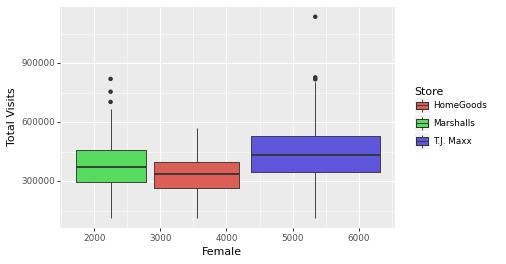

<ggplot: (286983590)>

In [24]:
(
    ggplot(df,aes('Female','Total Visits',fill='Store')) +geom_boxplot()
)

In [40]:
dff=df[df['State']=='Florida']

In [36]:
df['Male_density']=df['Male']/df['Population']

In [39]:
df['Male_density']

0      0.463901
1      0.471684
2      0.488600
3      0.456020
4      0.486008
         ...   
318    0.422956
319    0.412759
320    0.438372
321    0.517864
322    0.507094
Name: Male_density, Length: 323, dtype: float64

In [37]:
df['Female_density']=df['Female']/df['Population']

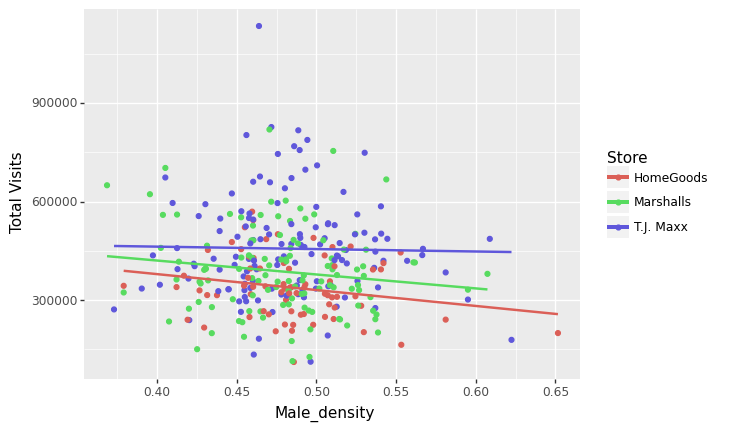

<ggplot: (342065939)>

In [41]:
(
    ggplot(df,aes('Male_density','Total Visits',color='Store')) +geom_point() + geom_smooth(method='lm',se=False)
)

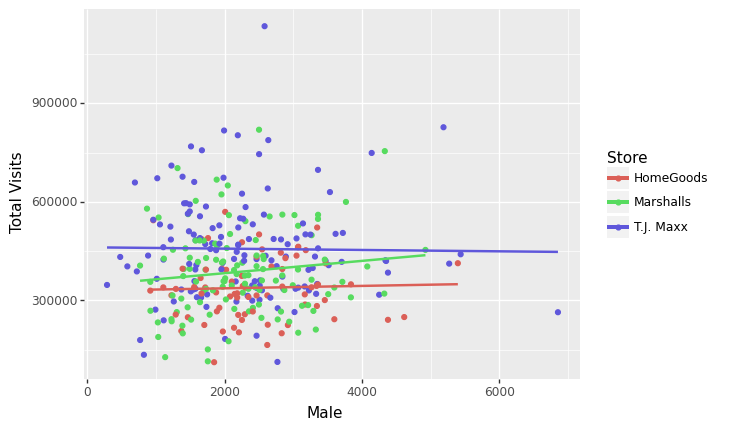

<ggplot: (342308461)>

In [43]:
(
    ggplot(df,aes('Male','Total Visits',color='Store')) +geom_point() + geom_smooth(method='lm',se=False)
)

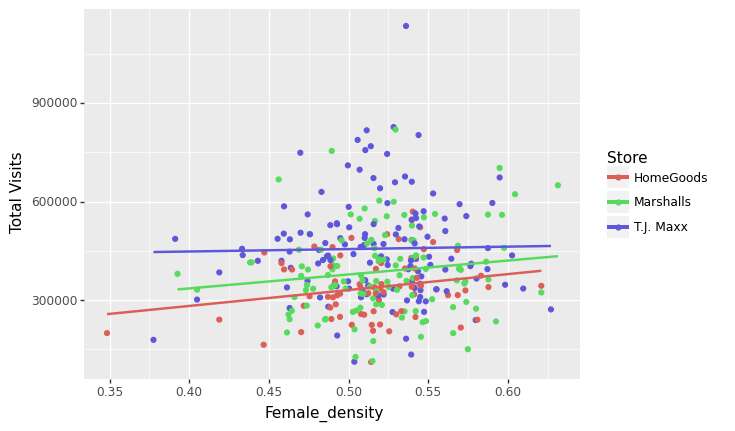

<ggplot: (342436479)>

In [44]:
(
    ggplot(df,aes('Female_density','Total Visits',color='Store')) +geom_point() + geom_smooth(method='lm',se=False)
)

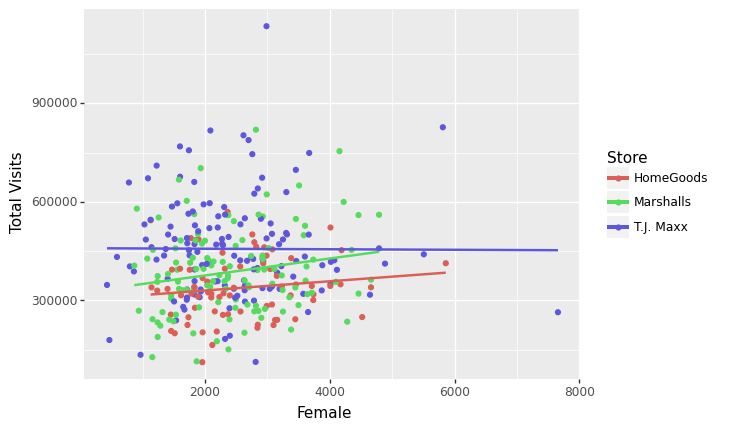

<ggplot: (342473156)>

In [45]:
(
    ggplot(df,aes('Female','Total Visits',color='Store')) +geom_point() + geom_smooth(method='lm',se=False)
)

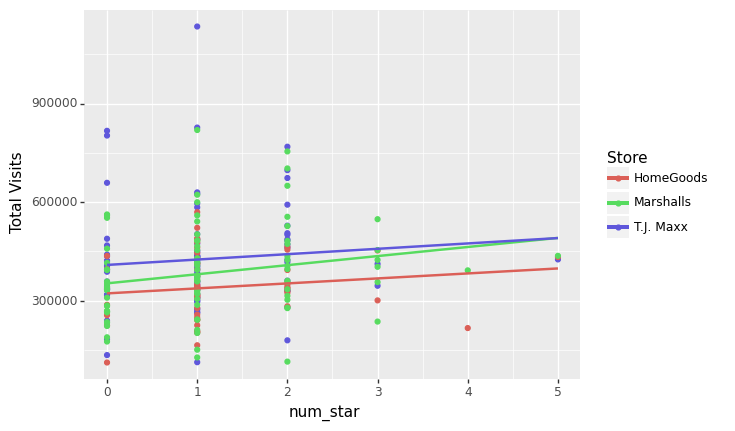

<ggplot: (341173239)>

In [33]:
(
    ggplot(dff,aes('num_star','Total Visits',color='Store')) +geom_point() + geom_smooth(method='lm',se=False)
)

In [46]:
df.to_csv('final3.csv')

In [5]:
tjs_new=pd.read_csv('final2.csv')
tjs_new.head()

,Rank,Store ID,Total Visits,lat,lng,Store,Address,State,City,County,...,Aldi's_visits_3m,Kroger_visits_3m,Piggly Wiggly_visits_3m,Publix_visits_3m,Sprouts Farmers Market's_visits_3m,The Fresh Market_visits_3m,Trader Joe_visits_3m,Walmart Neighborhood Market_visits_3m,Whole Foods Market_visits_3m,Winn-Dixie_visits_3m
0,1,1101.0,1134979,25.652978,-80.413893,T.J. Maxx,"13580 SW 120th St, Miami, FL, United States",Florida,Miami,Miami-Dade County,...,950022,0,0,5873822,0,0,0,0,0,0
1,2,603.0,827305,29.662078,-82.422818,T.J. Maxx,"1009 NW 76th Blvd, Gainesville, FL, United St...",Florida,Gainesville,Alachua County,...,0,0,0,3482123,0,281701,0,0,0,0
2,3,330.0,817421,30.492953,-87.226883,T.J. Maxx,"6625 North Davis Highway, Florida, United States",Florida,Pensacola,Escambia County,...,0,0,0,2032278,0,675316,0,715282,0,741829
3,4,1103.0,802937,26.587566,-80.145097,T.J. Maxx,"6330 Lantana Rd, Lake Worth, FL, United States",Florida,Lake Worth,Palm Beach County,...,680423,0,0,4696322,0,0,0,1337684,0,713399
4,5,20.0,768982,28.553691,-81.199645,T.J. Maxx,"391 N Alafaya Trl, Orlando, FL, United States",Florida,Orlando,Orange County,...,321943,0,0,1787405,0,0,0,805585,0,322481


In [93]:
 ### Loading Competing Stores  
a=pd.read_csv('df_all.csv') #all stores in florida
b=pd.read_csv('burlington-tennessee (Total).csv',skiprows=2)
c=pd.read_csv('kohl-s-tennessee (Total).csv',skiprows=2)
d=pd.read_csv('lowe-s-tennessee (Total).csv',skiprows=2)
e=pd.read_csv('ross-dress-for-less-tennessee (Total).csv',skiprows=2)
f=pd.read_csv('walmart-tennessee (Total).csv',skiprows=2)
g=pd.read_csv('the-home-depot-tennessee (Total).csv',skiprows=2)
h=pd.read_csv('burlington-alabama (Total).csv',skiprows=2)
i=pd.read_csv('kohl-s-alabama (Total).csv',skiprows=2)
j=pd.read_csv('lowe-s-alabama (Total).csv',skiprows=2)
k=pd.read_csv('ross-dress-for-less-alabama (Total).csv',skiprows=2)
l=pd.read_csv('the-home-depot-alabama (Total).csv',skiprows=2)
m=pd.read_csv('walmart-alabama (Total).csv',skiprows=2)


In [94]:
# Stack data on top of each other
stores= pd.concat([b,c,d,e,f,g,h,i,j,k,l,m],axis=0)  

In [95]:
# Split Store and Address
stores[['Store','Address']] = stores.Name.str.split('/',expand = True)
stores.drop(['Name'],axis = 1,inplace = True)

In [96]:
# Stack data on top of each other (stores in florida and stores in other states)
stores=pd.concat([a,stores],axis=0)  

In [97]:
stores=stores.reset_index()

In [98]:
stores[stores['Store']=='Burlington ']

,index,Rank,Store ID,Total Visits,lat,lng,Store,Address
520,520,1,348.0,927800,25.788163,-80.378347,Burlington,"11301 Nw 12th Street, Miami, FL, United States"
521,521,2,261.0,886591,25.865173,-80.294152,Burlington,"590 W 49th St, Hialeah, FL, United States"
522,522,3,209.0,770927,26.153096,-80.320191,Burlington,"12801 West Sunrise Boulevard, Sunrise, FL, Un..."
523,523,4,554.0,658119,28.090133,-81.977128,Burlington,"3800 Us Hwy 98 N 510, Lakeland, FL, United St..."
524,524,5,840.0,604898,28.803598,-81.337772,Burlington,"350 Town Center, Sanford, FL, United States"
...,...,...,...,...,...,...,...,...
1098,0,1,582.0,288849,31.254501,-85.423470,Burlington,"900 Commons Dr Ste 414, Dothan, AL, United St..."
1099,1,2,408.0,257538,32.362872,-86.156401,Burlington,"7721 Eastchase Pkwy, Montgomery, Alabama, Uni..."
1100,2,3,312.0,205209,30.679584,-88.123899,Burlington,"3250 Airport Blvd, Mobile, AL, United States"
1101,3,4,147.0,196630,33.399219,-86.804447,Burlington,"1615 Montgomery Hwy, Birmingham, AL, United S..."


In [99]:
stores

,index,Rank,Store ID,Total Visits,lat,lng,Store,Address
0,0,1,1792.0,1086355,26.255705,-80.102022,Lowe's,"1851 N Federal Hwy, Pompano Beach, FL, United..."
1,1,2,1855.0,990922,29.204567,-82.072570,Lowe's,"4600 E Silver Springs Blvd, Ocala, FL, United..."
2,2,3,448.0,984745,30.187798,-85.655294,Lowe's,"300 E 23rd St, Panama City, FL, United States"
3,3,4,2238.0,967459,28.188972,-82.462513,Lowe's,"21500 State Rd 54, Lutz, FL, United States"
4,4,5,417.0,951087,30.481002,-84.234443,Lowe's,"2121 NE Capitol Circle, Tallahassee, FL, Unit..."
...,...,...,...,...,...,...,...,...
1304,97,98,1100.0,1183103,34.119705,-87.992345,Walmart,"1706 Military St S, Hamilton, AL, United States"
1305,98,99,7247.0,1161551,31.037925,-87.495131,Walmart,"911 N Main St, Atmore, AL, United States"
1306,99,100,409.0,1099986,34.240525,-87.598899,Walmart,"42466 Highway 195, Haleyville, AL, United States"
1307,100,101,1057.0,892318,32.565993,-85.931379,Walmart,"2190 Gilmer Ave, Tallassee, AL, United States"


In [10]:
tjs_new=pd.read_csv('final2.csv')
stores=pd.read_csv('starbucks.csv')

In [11]:
stores

,storeNumber,countryCode,ownershipTypeCode,schedule,slug,latitude,longitude,streetAddressLine1,streetAddressLine2,streetAddressLine3,city,countrySubdivisionCode,postalCode
0,76618-99489,US,LS,"[{'dayName': 'Today', 'hours': '8:00 AM to 9:0...",target-miami-t-968-7795-sw-40th-st-miami-fl-33...,25.677542,-80.320688,7795 SW 40th St,NaN,NaN,Miami,FL,331568119
1,20628-195824,US,LS,"[{'dayName': 'Today', 'hours': '8:00 AM to 9:0...",target-dadeland-south-t-2843-7800-sw-104th-st-...,25.672798,-80.322664,7800 SW 104th St,NaN,NaN,Miami Shores,FL,33138
2,8227-994,US,CO,"[{'dayName': 'Today', 'hours': '5:30 AM to 9:3...",7708-north-kendall-drive-7708-north-kendall-dr...,25.687985,-80.320015,7708 North Kendall Drive,Space B5,NaN,Miami,FL,331567523
3,8470-23232,US,CO,"[{'dayName': 'Today', 'hours': '5:00 AM to 9:0...",9055-s-dixie-highway-9055-s-dixie-highway-shop...,25.686393,-80.310459,9055 S. Dixie Highway,NaN,Shoppes of Pine Crest,Pinecrest,FL,331561620
4,8520-64961,US,CO,"[{'dayName': 'Today', 'hours': '8:30 AM to 9:0...",dadeland-mall-macys-west-7575-sw-88th-street-m...,25.690545,-80.314965,7575 SW 88th Street,NaN,NaN,Miami,FL,331733562
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,23474-230264,US,CO,"[{'dayName': 'Today', 'hours': '5:30 AM to 9:0...",wilma-rudolph-2141-wilma-rudolph-blvd-clarksvi...,36.563910,-87.310438,2141 Wilma Rudolph Blvd,NaN,NaN,Clarksville,TN,370407065
1143,10845-102017,US,CO,"[{'dayName': 'Today', 'hours': '5:00 AM to 9:0...",madison-hwy-41-2235-madison-street-clarksville...,36.509308,-87.274565,2235 Madison Street,NaN,NaN,Clarksville,TN,370435287
1144,8484-54459,US,CO,"[{'dayName': 'Today', 'hours': '5:00 AM to 8:0...",a-1-a-state-rd-3-1047-a-1-a-beach-blvd-anastas...,29.828730,-81.272224,1047 A1A Beach Blvd.,Suite #18,Anastasia Plaza,St. Augustine,FL,320806731
1145,20271-202065,US,CO,"[{'dayName': 'Today', 'hours': '5:00 AM to 10:...",florence-al-357-cox-creek-parkway-florence-al-...,34.839286,-87.635958,357 Cox Creek Parkway,NaN,NaN,Florence,AL,356301539


In [161]:
stores=pd.read_csv('starbucks.csv')

In [163]:
stores

,storeNumber,countryCode,ownershipTypeCode,schedule,slug,latitude,longitude,streetAddressLine1,streetAddressLine2,streetAddressLine3,city,countrySubdivisionCode,postalCode
0,76618-99489,US,LS,"[{'dayName': 'Today', 'hours': '8:00 AM to 9:0...",target-miami-t-968-7795-sw-40th-st-miami-fl-33...,25.677542,-80.320688,7795 SW 40th St,NaN,NaN,Miami,FL,331568119
1,20628-195824,US,LS,"[{'dayName': 'Today', 'hours': '8:00 AM to 9:0...",target-dadeland-south-t-2843-7800-sw-104th-st-...,25.672798,-80.322664,7800 SW 104th St,NaN,NaN,Miami Shores,FL,33138
2,8227-994,US,CO,"[{'dayName': 'Today', 'hours': '5:30 AM to 9:3...",7708-north-kendall-drive-7708-north-kendall-dr...,25.687985,-80.320015,7708 North Kendall Drive,Space B5,NaN,Miami,FL,331567523
3,8470-23232,US,CO,"[{'dayName': 'Today', 'hours': '5:00 AM to 9:0...",9055-s-dixie-highway-9055-s-dixie-highway-shop...,25.686393,-80.310459,9055 S. Dixie Highway,NaN,Shoppes of Pine Crest,Pinecrest,FL,331561620
4,8520-64961,US,CO,"[{'dayName': 'Today', 'hours': '8:30 AM to 9:0...",dadeland-mall-macys-west-7575-sw-88th-street-m...,25.690545,-80.314965,7575 SW 88th Street,NaN,NaN,Miami,FL,331733562
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,23474-230264,US,CO,"[{'dayName': 'Today', 'hours': '5:30 AM to 9:0...",wilma-rudolph-2141-wilma-rudolph-blvd-clarksvi...,36.563910,-87.310438,2141 Wilma Rudolph Blvd,NaN,NaN,Clarksville,TN,370407065
1143,10845-102017,US,CO,"[{'dayName': 'Today', 'hours': '5:00 AM to 9:0...",madison-hwy-41-2235-madison-street-clarksville...,36.509308,-87.274565,2235 Madison Street,NaN,NaN,Clarksville,TN,370435287
1144,8484-54459,US,CO,"[{'dayName': 'Today', 'hours': '5:00 AM to 8:0...",a-1-a-state-rd-3-1047-a-1-a-beach-blvd-anastas...,29.828730,-81.272224,1047 A1A Beach Blvd.,Suite #18,Anastasia Plaza,St. Augustine,FL,320806731
1145,20271-202065,US,CO,"[{'dayName': 'Today', 'hours': '5:00 AM to 10:...",florence-al-357-cox-creek-parkway-florence-al-...,34.839286,-87.635958,357 Cox Creek Parkway,NaN,NaN,Florence,AL,356301539


In [164]:
# add competing stores Total
df['num_star']=np.nan

for i in range(len(df)):
    count=0
    for j in range(len(stores)):
        coord1=(stores['latitude'][j],stores['longitude'][j])
        coord2=(df['INTPTLAT'][i],df['INTPTLON'][i])
        distance=geodesic(coord1,coord2).miles
        if distance<=0.7:
            count+=1
    df['num_star'][i]=count
    print(i)

<ipython-input-164-f2c3b16e86af>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977


In [166]:
df.to_csv('11141.csv')

In [168]:
final2=pd.read_csv('final2.csv')

In [169]:
final2

,Rank,Store ID,Total Visits,lat,lng,Store,Address,State,City,County,...,Winn-Dixie_visits_3m,Is_Florida,Is_Tennessee,Is_Alabama,TJ.Maxx,Marshalls,HomeGoods,Female,GDP.County,num_star
0,1,1101.0,1134979,25.652978,-80.413893,T.J. Maxx,"13580 SW 120th St, Miami, FL, United States",Florida,Miami,Miami-Dade County,...,0,1,0,0,1,0,0,2985,140522662,1
1,2,603.0,827305,29.662078,-82.422818,T.J. Maxx,"1009 NW 76th Blvd, Gainesville, FL, United St...",Florida,Gainesville,Alachua County,...,0,1,0,0,1,0,0,5812,12653895,1
2,3,330.0,817421,30.492953,-87.226883,T.J. Maxx,"6625 North Davis Highway, Florida, United States",Florida,Pensacola,Escambia County,...,741829,1,0,0,1,0,0,2086,14144123,0
3,4,1103.0,802937,26.587566,-80.145097,T.J. Maxx,"6330 Lantana Rd, Lake Worth, FL, United States",Florida,Lake Worth,Palm Beach County,...,713399,1,0,0,1,0,0,2616,75792930,0
4,5,20.0,768982,28.553691,-81.199645,T.J. Maxx,"391 N Alafaya Trl, Orlando, FL, United States",Florida,Orlando,Orange County,...,322481,1,0,0,1,0,0,1598,83705113,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,18,1001.0,411169,36.543537,-82.516459,T.J. Maxx,"2003 N Eastman Rd, Ste 60, Kingsport, TN, Uni...",Tennessee,Kingsport,Sullivan County,...,0,0,1,0,1,0,0,2026,6559245,1
319,19,118.0,394611,36.292956,-86.700558,T.J. Maxx,"1627 Gallatin Pike,Road N, Goodlettsville, TN...",Tennessee,Nashville-Davidson,Davidson County,...,0,0,1,0,1,0,0,2780,60309852,1
320,20,585.0,327611,36.075803,-86.921913,T.J. Maxx,"Nashville, TN, United States",Tennessee,Nashville-Davidson,Davidson County,...,0,0,1,0,1,0,0,1932,60309852,1
321,21,NaN,308351,35.150453,-89.919667,T.J. Maxx,"4220 Summer Ave, Memphis, TN, United States",Tennessee,Memphis,Shelby County,...,0,0,1,0,1,0,0,2483,55126272,0


In [172]:
df['tjmaxx_3m']=np.nan
df['Marshalls_3m']=np.nan
df['Homegoods_3m']=np.nan
df['tjmaxx_visits_3m']=np.nan
df['Marshalls_visits_3m']=np.nan
df['Homegoods_visits_3m']=np.nan

In [186]:
# geting the values of competing stores
for i in range(len(df)):
    tjmaxx_3m1=0
    Marshalls_3m1=0
    Homegoods_3m1=0
    tjmaxx_visits_3m1=0
    Marshalls_visits_3m1=0
    Homegoods_visits_3m1=0
    for j in range(len(final2)):
            coord1=(final2['lat'][j],final2['lng'][j])
            coord2=(df['INTPTLAT'][i],df['INTPTLON'][i])
            distance=geodesic(coord1,coord2).miles
            if distance<=3:
                if final2['Store'][j]=="T.J. Maxx":
                    tjmaxx_3m1+=1
                    tjmaxx_visits_3m1+=final2['Total Visits'][j]
                if final2['Store'][j]=="Marshalls":
                    Marshalls_3m1+=1
                    Marshalls_visits_3m1+=final2['Total Visits'][j]
                if final2['Store'][j]=="HomeGoods":
                    Homegoods_3m1+=1
                    Homegoods_visits_3m1+=final2['Total Visits'][j]
            else:  
                pass
    
    df['tjmaxx_3m'][i]=tjmaxx_3m1
    df['Marshalls_3m'][i]=Marshalls_3m1
    df['Homegoods_3m'][i]=Homegoods_3m1
    df['tjmaxx_visits_3m'][i]=tjmaxx_visits_3m1
    df['Marshalls_visits_3m'][i]=Marshalls_visits_3m1
    df['Homegoods_visits_3m'][i]=Homegoods_visits_3m1
    print(i)

<ipython-input-186-0a7cccd5909e>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-186-0a7cccd5909e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-186-0a7cccd5909e>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-186-0a7cccd5909e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700


5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339


6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978


In [187]:
df.to_csv('111143.csv')

In [191]:
df=pd.read_csv('nov14.csv')

In [192]:
df.dropna()

,index,GEOID,INTPTLAT,INTPTLON,State,County,TRACT,StateID,CountyID,Population,...,The Fresh Market_visits_3m,Whole Foods Market_visits_3m.1,Winn-Dixie_visits_3m,num_star,tjmaxx_3m,Marshalls_3m,Homegoods_3m,tjmaxx_visits_3m,Marshalls_visits_3m,Homegoods_visits_3m
0,0,1063060102,32.914991,-87.864992,Alabama,Greene County,60102.0,1.0,63.0,1972.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1063060101,32.779875,-87.936632,Alabama,Greene County,60101.0,1.0,63.0,1571.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1069040802,31.149447,-85.418679,Alabama,Houston County,40802.0,1.0,69.0,4022.0,...,0,0,0,0,0,0,0,0,0,0
3,3,1069040204,31.247949,-85.445710,Alabama,Houston County,40204.0,1.0,69.0,6220.0,...,0,0,416448,0,1,0,1,710596,0,368202
4,4,1069041902,31.162583,-85.235238,Alabama,Houston County,41902.0,1.0,69.0,4858.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,8293,47073050601,36.583644,-82.631866,Tennessee,Hawkins County,50601.0,47.0,73.0,5813.0,...,0,0,0,0,0,0,0,0,0,0
8037,8294,47073050602,36.546722,-82.645838,Tennessee,Hawkins County,50602.0,47.0,73.0,4408.0,...,0,0,0,0,0,0,0,0,0,0
8038,8295,47073050503,36.522540,-82.697028,Tennessee,Hawkins County,50503.0,47.0,73.0,4662.0,...,0,0,0,0,0,0,0,0,0,0
8039,8296,47157003200,35.137096,-89.996920,Tennessee,Shelby County,3200.0,47.0,157.0,3806.0,...,415079,0,0,2,0,0,0,0,0,0


In [194]:
df.to_csv('testing_dataset.csv')

In [175]:
df.to_csv('111142.csv')

In [22]:
tjs_new=pd.read_csv('final.csv')

In [13]:
tjs_new.to_csv('tjs_new.csv')

In [100]:
list1=["Lowe's_3m",'The Home Depot_3m','Walmart_3m','Burlington_3m',"Kohl's_3m", 'Ross Dress for Less_3m',
      "Lowe's_visits_3m",'The Home Depot_visits_3m','Walmart_visits_3m','Burlington_visits_3m',"Kohl's_visits_3m", 'Ross Dress for Less_visits_3m']

In [101]:
for i in list1:
    df[i]=np.nan

In [106]:
df.reset_index()

,index,Unnamed: 0,STATEFP,COUNTYFP,TRACTCE,GEOID,INTPTLAT,INTPTLON,State,County,...,Walmart_3m,Burlington_3m,Kohl's_3m,Ross Dress for Less_3m,Lowe's_visits_3m,The Home Depot_visits_3m,Walmart_visits_3m,Burlington_visits_3m,Kohl's_visits_3m,Ross Dress for Less_visits_3m
0,0,0,1,63,60102,1063060102,32.914991,-87.864992,Alabama,Greene County,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,63,60101,1063060101,32.779875,-87.936632,Alabama,Greene County,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,1,69,40802,1069040802,31.149447,-85.418679,Alabama,Houston County,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1883547.0,0.0,0.0
3,3,3,1,69,40204,1069040204,31.247949,-85.445710,Alabama,Houston County,...,1.0,1.0,1.0,1.0,800014.0,569065.0,288849.0,2502895.0,292021.0,436236.0
4,4,4,1,69,41902,1069041902,31.162583,-85.235238,Alabama,Houston County,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,8293,8293,47,73,50601,47073050601,36.583644,-82.631866,Tennessee,Hawkins County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8037,8294,8294,47,73,50602,47073050602,36.546722,-82.645838,Tennessee,Hawkins County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8038,8295,8295,47,73,50503,47073050503,36.522540,-82.697028,Tennessee,Hawkins County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8039,8296,8296,47,157,3200,47157003200,35.137096,-89.996920,Tennessee,Shelby County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
df

,Unnamed: 0,STATEFP,COUNTYFP,TRACTCE,GEOID,INTPTLAT,INTPTLON,State,County,TRACT,...,Walmart_3m,Burlington_3m,Kohl's_3m,Ross Dress for Less_3m,Lowe's_visits_3m,The Home Depot_visits_3m,Walmart_visits_3m,Burlington_visits_3m,Kohl's_visits_3m,Ross Dress for Less_visits_3m
0,0,1,63,60102,1063060102,32.914991,-87.864992,Alabama,Greene County,60102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,63,60101,1063060101,32.779875,-87.936632,Alabama,Greene County,60101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,69,40802,1069040802,31.149447,-85.418679,Alabama,Houston County,40802.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1883547.0,0.0,0.0
3,3,1,69,40204,1069040204,31.247949,-85.445710,Alabama,Houston County,40204.0,...,1.0,1.0,1.0,1.0,800014.0,569065.0,288849.0,2502895.0,292021.0,436236.0
4,4,1,69,41902,1069041902,31.162583,-85.235238,Alabama,Houston County,41902.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,8293,47,73,50601,47073050601,36.583644,-82.631866,Tennessee,Hawkins County,50601.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8294,8294,47,73,50602,47073050602,36.546722,-82.645838,Tennessee,Hawkins County,50602.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8295,8295,47,73,50503,47073050503,36.522540,-82.697028,Tennessee,Hawkins County,50503.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8296,8296,47,157,3200,47157003200,35.137096,-89.996920,Tennessee,Shelby County,3200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df=df.reset_index()

In [118]:
# add competing stores each
# store_count/ store_total_visits within 3mile
for i in range(0,len(df)):
    count_lowes=0
    visits_lowes=0
    count_the_home_depot=0
    visits_the_home_depot=0
    count_walmart=0
    visits_walmart=0
    count_burlington=0
    visits_burlington=0
    count_kohls=0
    visits_kohls=0
    count_ross_dress_for_less=0
    visits_ross_dress_for_less=0
    for j in range(len(stores)):
        coord1=(stores['lat'][j],stores['lng'][j])
        coord2=(str(df['INTPTLAT'][i]),str(df['INTPTLON'][i]))
        distance=geodesic(coord1,coord2).miles
        if distance<=3:
            if stores['Store'][j]=="Lowe's ":
                count_lowes+=1
                visits_lowes+=stores['Total Visits'][j]
            elif stores['Store'][j]=='The Home Depot ':
                count_the_home_depot+=1
                visits_the_home_depot+=stores['Total Visits'][j]
            elif stores['Store'][j]=='Walmart ':
                count_walmart+=1
                visits_walmart+=stores['Total Visits'][j]
            elif stores['Store'][j]=='Burlington ':
                count_burlington+=1
                visits_burlington+=stores['Total Visits'][j]
            elif stores['Store'][j]=="Kohl's ":
                count_kohls+=1
                visits_kohls+=stores['Total Visits'][j]
            elif stores['Store'][j]=='Ross Dress for Less ':
                count_ross_dress_for_less+=1
                visits_ross_dress_for_less+=stores['Total Visits'][j]
        else:
            pass
    df["Lowe's_3m"][i]=count_lowes
    df['The Home Depot_3m'][i]=count_the_home_depot
    df['Burlington_3m'][i]=count_walmart
    df['Walmart_3m'][i]=count_burlington
    df["Kohl's_3m"][i]=count_kohls
    df['Ross Dress for Less_3m'][i]=count_ross_dress_for_less
    df["Lowe's_visits_3m"][i]=visits_lowes
    df['The Home Depot_visits_3m'][i]=visits_the_home_depot
    df['Burlington_visits_3m'][i]=visits_walmart
    df['Walmart_visits_3m'][i]=visits_burlington
    df["Kohl's_visits_3m"][i]=visits_kohls
    df['Ross Dress for Less_visits_3m'][i]=visits_ross_dress_for_less
    print(i)    

<ipython-input-118-8fc2a86d268e>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-118-8fc2a86d268e>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-118-8fc2a86d268e>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-118-8fc2a86d268e>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977


In [119]:
df.to_csv('8040.csv')

In [26]:
tjs_new.to_csv('final1.csv')

In [19]:
tjs_new=pd.read_csv('final1.csv')

In [120]:
list1=["Lowe's_1m",'The Home Depot_1m','Walmart_1m','Burlington_1m',"Kohl's_1m", 'Ross Dress for Less_1m',
      "Lowe's_visits_1m",'The Home Depot_visits_1m','Walmart_visits_1m','Burlington_visits_1m',"Kohl's_visits_1m", 'Ross Dress for Less_visits_1m']

In [121]:
for i in list1:
    df[i]=np.nan

In [123]:
# add competing stores each
# store_count/ store_total_visits within 1mile
for i in range(len(df)):
    count_lowes=0
    visits_lowes=0
    count_the_home_depot=0
    visits_the_home_depot=0
    count_walmart=0
    visits_walmart=0
    count_burlington=0
    visits_burlington=0
    count_kohls=0
    visits_kohls=0
    count_ross_dress_for_less=0
    visits_ross_dress_for_less=0
    for j in range(len(stores)):
        coord1=(stores['lat'][j],stores['lng'][j])
        coord2=(df['INTPTLAT'][i],df['INTPTLON'][i])
        distance=geodesic(coord1,coord2).miles
        if distance<=1:
            if stores['Store'][j]=="Lowe's ":
                count_lowes+=1
                visits_lowes+=stores['Total Visits'][j]
            elif stores['Store'][j]=='The Home Depot ':
                count_the_home_depot+=1
                visits_the_home_depot+=stores['Total Visits'][j]
            elif stores['Store'][j]=='Walmart ':
                count_walmart+=1
                visits_walmart+=stores['Total Visits'][j]
            elif stores['Store'][j]=='Burlington ':
                count_burlington+=1
                visits_burlington+=stores['Total Visits'][j]
            elif stores['Store'][j]=="Kohl's ":
                count_kohls+=1
                visits_kohls+=stores['Total Visits'][j]
            elif stores['Store'][j]=='Ross Dress for Less ':
                count_ross_dress_for_less+=1
                visits_ross_dress_for_less+=stores['Total Visits'][j]
        else:
            pass
    df["Lowe's_1m"][i]=count_lowes
    df['The Home Depot_1m'][i]=count_the_home_depot
    df['Burlington_1m'][i]=count_walmart
    df['Walmart_1m'][i]=count_burlington
    df["Kohl's_1m"][i]=count_kohls
    df['Ross Dress for Less_1m'][i]=count_ross_dress_for_less
    df["Lowe's_visits_1m"][i]=visits_lowes
    df['The Home Depot_visits_1m'][i]=visits_the_home_depot
    df['Burlington_visits_1m'][i]=visits_walmart
    df['Walmart_visits_1m'][i]=visits_burlington
    df["Kohl's_visits_1m"][i]=visits_kohls
    df['Ross Dress for Less_visits_1m'][i]=visits_ross_dress_for_less
    print(i)

<ipython-input-123-63099ac77aa8>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-123-63099ac77aa8>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-123-63099ac77aa8>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-123-63099ac77aa8>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977


In [125]:
df.to_csv('with_stores.csv')

In [153]:
#grocery stores
list1=["Aldi's_3m","Publix_3m","The Fresh Market_3m","Whole Foods Market_3m","Winn-Dixie_3m",
     "Aldi's_visits_3m","Publix_visits_3m","The Fresh Market_visits_3m","Whole Foods Market_visits_3m","Winn-Dixie_visits_3m"]

In [157]:
for i in list1:
    df[i]=np.nan

In [177]:
stores=pd.read_csv("Grocery.csv")

In [136]:
stores[stores['Chain']=='Winn-Dixie']

,Rank,Name,Total Visits,lat,lng,Chain,Plotted,Percentile,State Rank
247,1,"Winn-Dixie / 701 E Main St, Prattville, AL, Un...",739947,32.462128,-86.455375,Winn-Dixie,38,0.97,1/38
248,2,"Winn-Dixie / 7946 Vaughn Rd, Montgomery, AL, U...",603234,32.337215,-86.177211,Winn-Dixie,38,0.94,2/38
249,3,"Winn-Dixie / 1721 Decatur Hwy, Fultondale, AL,...",602427,33.612563,-86.795417,Winn-Dixie,38,0.92,3/38
250,4,"Winn-Dixie / 1952 West Dallas Ave., Selma, AL,...",594198,32.398481,-87.065984,Winn-Dixie,38,0.89,4/38
251,5,"Winn-Dixie / 9082 Moffett Rd, Semmes, AL, Unit...",582007,30.780116,-88.257111,Winn-Dixie,38,0.86,5/38
...,...,...,...,...,...,...,...,...,...
1717,270,"Winn-Dixie / 3792 S Suncoast Blvd, Homosassa, ...",130799,28.807097,-82.578681,Winn-Dixie,274,0.01,270/274
1718,271,"Winn-Dixie / 1055 W Hallandale Beach Blvd, Hal...",126220,25.983522,-80.163685,Winn-Dixie,274,0.01,271/274
1719,272,"Winn-Dixie / 1602 Lake Trafford Rd, Immokalee,...",119363,26.434139,-81.435912,Winn-Dixie,274,0.00,272/274
1720,273,"Winn-Dixie / 1296 County Road 1, Dunedin, FL, ...",106745,28.021474,-82.764162,Winn-Dixie,274,0.00,273/274


In [131]:
stores

,Rank,Name,Total Visits,lat,lng,Chain,Plotted,Percentile,State Rank
0,1,"Aldi / 1349 McFarland Boulevard, Tuscaloosa, A...",461164,33.199596,-87.524361,Aldi,30,0.96,1/30
1,2,"Aldi / 1025 Marble Terrace, Hoover, AL, United...",308383,33.354053,-86.847083,Aldi,30,0.93,2/30
2,3,"Aldi / 1568 Eastern Blvd, Montgomery, AL, Unit...",301500,32.356465,-86.219560,Aldi,30,0.90,3/30
3,4,"Aldi / 5485 Patrick Way, Birmingham, AL, Unite...",292778,33.610292,-86.623497,Aldi,30,0.86,4/30
4,5,"Aldi / 200 N Hood Ave, Gadsden, AL, United States",275791,34.010305,-85.993438,Aldi,30,0.83,5/30
...,...,...,...,...,...,...,...,...,...
2261,3,"Whole Foods Market / 301 Manufacturers Rd, Cha...",940200,35.063397,-85.314258,Whole Foods Market,7,0.57,3/7
2262,4,"Whole Foods Market / 1566 W McEwen Dr, Frankli...",904768,35.934213,-86.824971,Whole Foods Market,7,0.42,4/7
2263,5,"Whole Foods Market / 4021 Hillsboro Pike, Nash...",561353,36.103163,-86.818802,Whole Foods Market,7,0.28,5/7
2264,6,"Whole Foods Market / 7825 Poplar Ave, Germanto...",547879,35.088883,-89.802100,Whole Foods Market,7,0.14,6/7


In [179]:
df

,index,Unnamed: 0,STATEFP,COUNTYFP,TRACTCE,GEOID,INTPTLAT,INTPTLON,State,County,...,Winn-Dixie_visits_3m,Winn-Dixie_3m,Aldi's_visits_3m,num_star,tjmaxx_3m,Marshalls_3m,Homegoods_3m,tjmaxx_visits_3m,Marshalls_visits_3m,Homegoods_visits_3m
0,0,0,1,63,60102,1063060102,32.914991,-87.864992,Alabama,Greene County,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,63,60101,1063060101,32.779875,-87.936632,Alabama,Greene County,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,1,69,40802,1069040802,31.149447,-85.418679,Alabama,Houston County,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1,69,40204,1069040204,31.247949,-85.445710,Alabama,Houston County,...,416448.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,1,69,41902,1069041902,31.162583,-85.235238,Alabama,Houston County,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,8293,8293,47,73,50601,47073050601,36.583644,-82.631866,Tennessee,Hawkins County,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8037,8294,8294,47,73,50602,47073050602,36.546722,-82.645838,Tennessee,Hawkins County,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8038,8295,8295,47,73,50503,47073050503,36.522540,-82.697028,Tennessee,Hawkins County,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8039,8296,8296,47,157,3200,47157003200,35.137096,-89.996920,Tennessee,Shelby County,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
# add competing stores each
# store_count/ store_total_visits within 1mile
for i in range(len(df)):
    
    visits_Whole_Foods_Market_3m=0
    for j in range(len(stores)):
        coord1=(stores['lat'][j],stores['lng'][j])
        coord2=(df['INTPTLAT'][i],df['INTPTLON'][i])
        distance=geodesic(coord1,coord2).miles
        if distance<=3:
            if stores['Chain'][j]=="Whole Foods Market":
                visits_Whole_Foods_Market_3m+=stores['Total Visits'][j]
        else:
            pass
    df["Whole Foods Market_visits_3m"][i]=visits_Whole_Foods_Market_3m
   
    print(i)

<ipython-input-180-2e063c5d4601>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977


In [181]:
df.to_csv('nov141.csv')

In [ ]:
#grocery stores
list1=["Aldi's_3m","Publix_3m","The Fresh Market_3m","Whole Foods Market_3m","Winn-Dixie_3m"
     "Aldi's_visits_3m","Publix_visits_3m","The Fresh Market_visits_3m","Whole Foods Market_visits_3m","Winn-Dixie_visits_3m"]

In [26]:
tjs_new.to_csv('final2.csv')